"An analysis of NYC Open Parking Violation Data"

In [9]:
import pandas as pd

path='C:/Users/jimmy/Downloads/Parking-Violations.csv'
df=pd.read_csv(path)

c:\Users\jimmy\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
import matplotlib.pyplot as plt

state_counts={}
for i in list(df['Registration State']):
    if i in state_counts.keys():
        state_counts[i]+=1
    else:
        state_counts[i]=1

<BarContainer object of 27 artists>

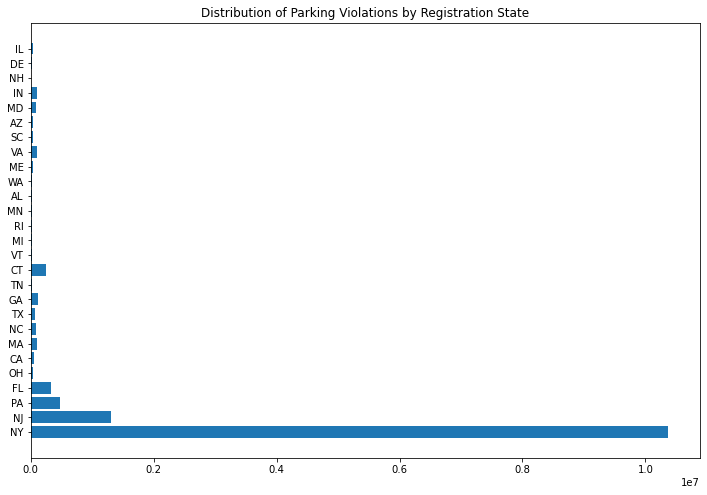

In [85]:
new_state_counts={}
for k in state_counts.keys():
    if state_counts[k]>10000:
        new_state_counts[k]=state_counts[k]
new_state_counts.pop('99')

fig, ax=plt.subplots(figsize=(12,8))
plt.title('Distribution of Parking Violations by Registration State')
ax.barh(list(new_state_counts.keys()), list(new_state_counts.values()))

#ax.set_xticklabels([x*1000000 for x in range(10)])


[Text(0.5, 1.0, '10 most common parking violations in NYC')]

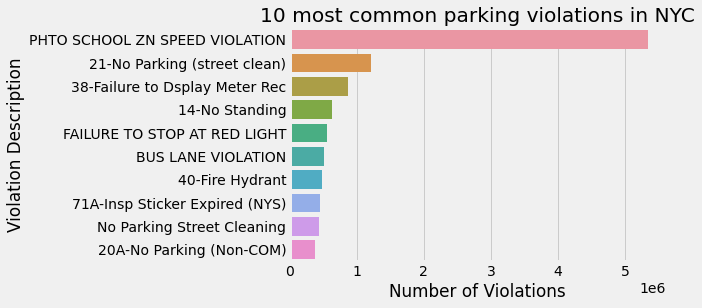

In [164]:
import seaborn as sns
fig, ax=plt.subplots()
ax.set_ylim(600000)
top_ten=pd.DataFrame(df['Violation Description'].value_counts().head(10))
top_ten=top_ten.reset_index()
mapping={'index': 'Violation Description', 'Violation Description': 'Number of Violations'}
top_ten=top_ten.rename(columns=mapping)
sns.barplot(data=top_ten, y='Violation Description', x='Number of Violations').set(title='10 most common parking violations in NYC')
